# <center> Анализ информации по выбросам

In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# путь, по которому считываем файлы
output_path = 'D:/documents/1_projects/GreenDesign/data/output/'

In [60]:
# считываем файл
df = pd.read_excel(output_path + 'result_prepare.xlsx', index_col='Unnamed: 0')

## Группируем по обществам

### Аггрегация по сумме выбросов

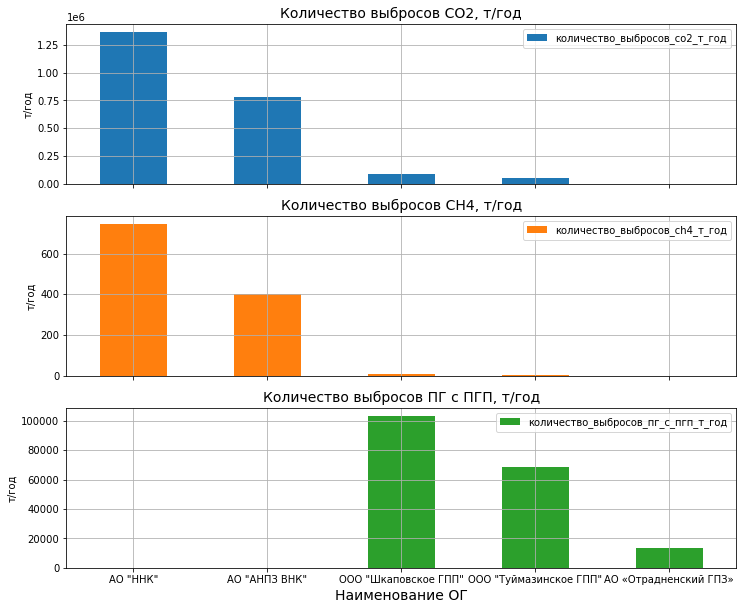

In [61]:
# группируем по обществу и суммируем по выбранным столбцам, сортируем по выбросам СО2
df_og_group = df.groupby(by='Наименование ОГ', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].sum()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)

# строим график
axes = df_og_group.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 10),
    x='Наименование ОГ',
    subplots=True,
    rot=0
);
axes[0].set_title('Количество выбросов СО2, т/год', fontsize=14)
axes[1].set_title('Количество выбросов CH4, т/год', fontsize=14)
axes[2].set_title('Количество выбросов ПГ с ПГП, т/год', fontsize=14);

axes[0].set_ylabel('т/год')
axes[1].set_ylabel('т/год')
axes[2].set_ylabel('т/год');
axes[2].set_xlabel('Наименование ОГ', fontsize=14);

### Аггрегация по количеству источников выбросов

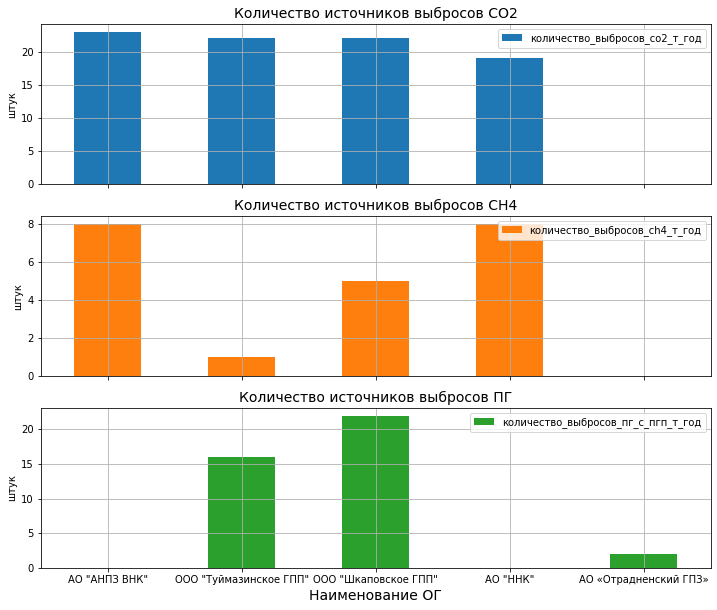

In [65]:
# группируем по обществу и определяем количество источников, сортируем по выбросам СО2
df_og_group_ist_count = df.groupby(by='Наименование ОГ', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].count()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)

# строим график
axes = df_og_group_ist_count.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 10),
    x='Наименование ОГ',
    subplots=True,
    rot=0
);
axes[0].set_title('Количество источников выбросов СО2', fontsize=14)
axes[1].set_title('Количество источников выбросов CH4', fontsize=14)
axes[2].set_title('Количество источников выбросов ПГ', fontsize=14);

axes[0].set_ylabel('штук')
axes[1].set_ylabel('штук')
axes[2].set_ylabel('штук');
axes[2].set_xlabel('Наименование ОГ', fontsize=14);

In [66]:
df.head(2)

,Наименование ОГ,Субъект РФ,Цех,Наименование площадки,Объект предприятия,вид_оборудования,вид_выбросов,тип_выбросов,название_топлива,вид_топлива,расход_топлива_т_год,количество_выбросов_со2_т_год,количество_выбросов_сh4_т_год,количество_выбросов_пг_с_пгп_т_год
0,"ООО ""Шкаповское ГПП""",Республика Башкортостан,NaN,NaN,Газокомпрессорный участок,прочее,Стационарное сжигание топлива,охват 1,иное газообразное топливо,газообразное топливо,0.994041,3093.9337,NaN,16768.0
1,"ООО ""Шкаповское ГПП""",Республика Башкортостан,NaN,NaN,Установка маслоабсорбции,печь,Стационарное сжигание топлива,охват 1,иное газообразное топливо,газообразное топливо,1.862527,5343.4955,NaN,5344.0


### Виды источников выбросов в разрезе обществ (сумма выбросов)

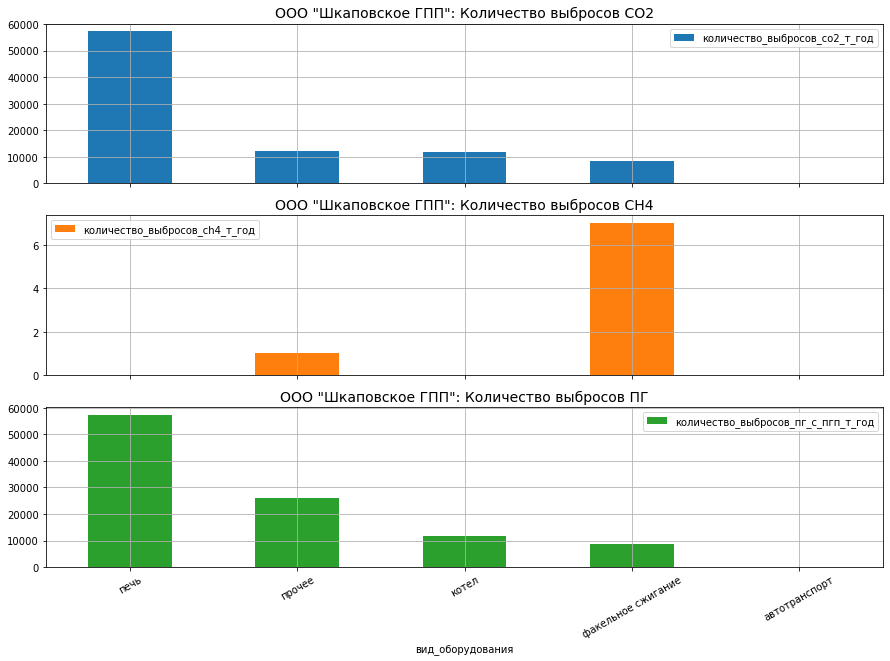

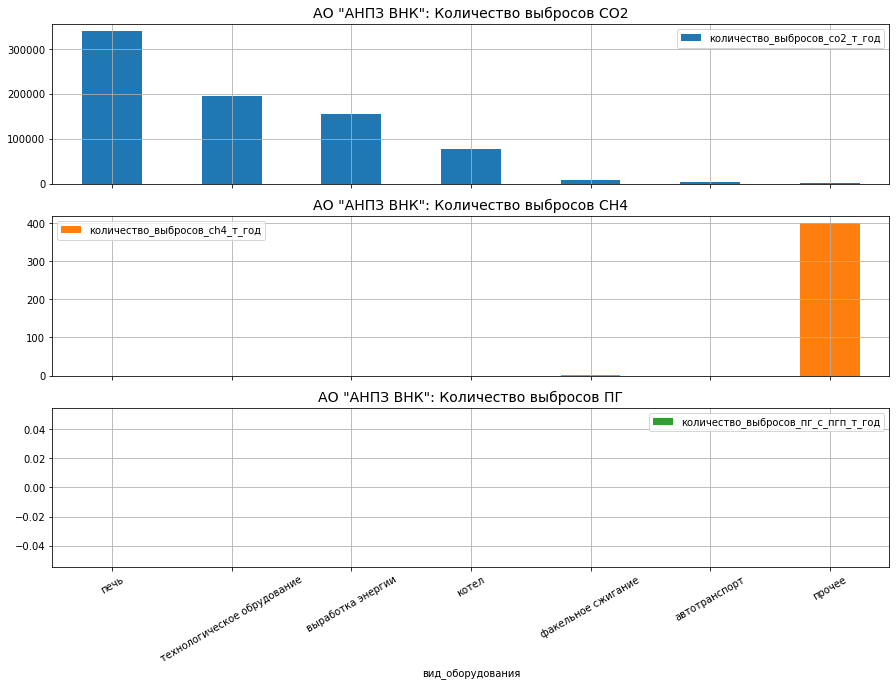

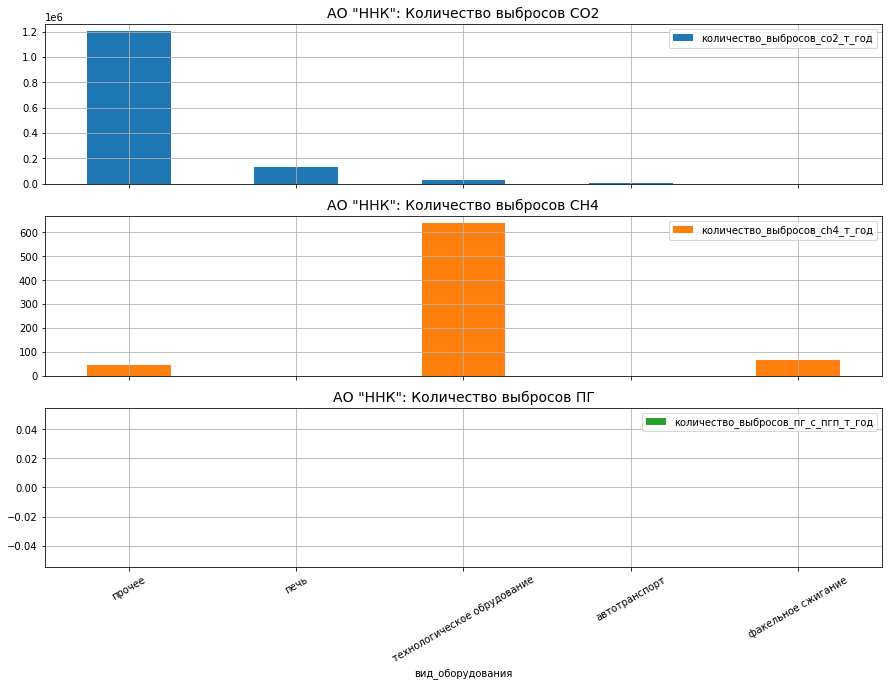

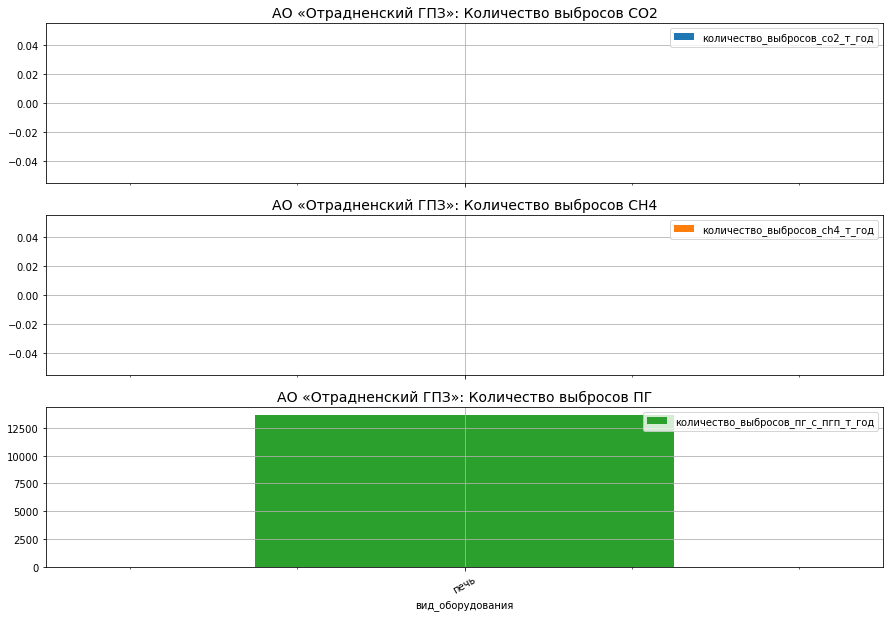

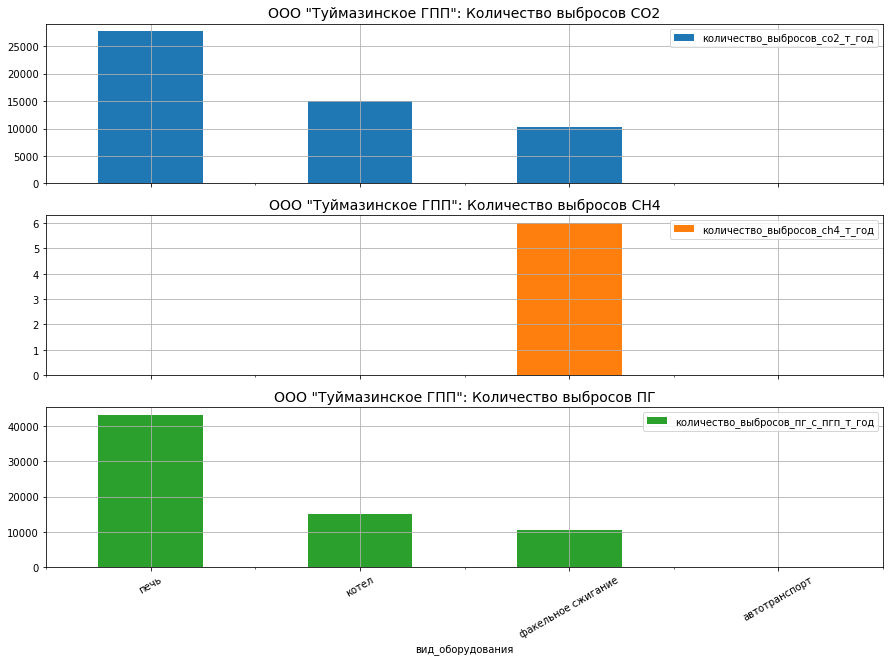

In [74]:
# группируем по обществу и внутри общесва группируем по источникам

# Для каждого ОГ
for og in df['Наименование ОГ'].unique():
        mask = df['Наименование ОГ'] == og
        temp_og_df = df[mask].groupby(by='вид_оборудования', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].sum()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)
        
        axes = temp_og_df.plot( 
        kind='bar', 
        grid=True, 
        figsize=(15, 10),
        x='вид_оборудования',
        subplots=True,
        rot=30
        );
        axes[0].set_title(f'{og}: Количество выбросов СО2', fontsize=14)
        axes[1].set_title(f'{og}: Количество выбросов CH4', fontsize=14)
        axes[2].set_title(f'{og}: Количество выбросов ПГ', fontsize=14);


### Виды источников выбросов в разрезе обществ (количество источников)

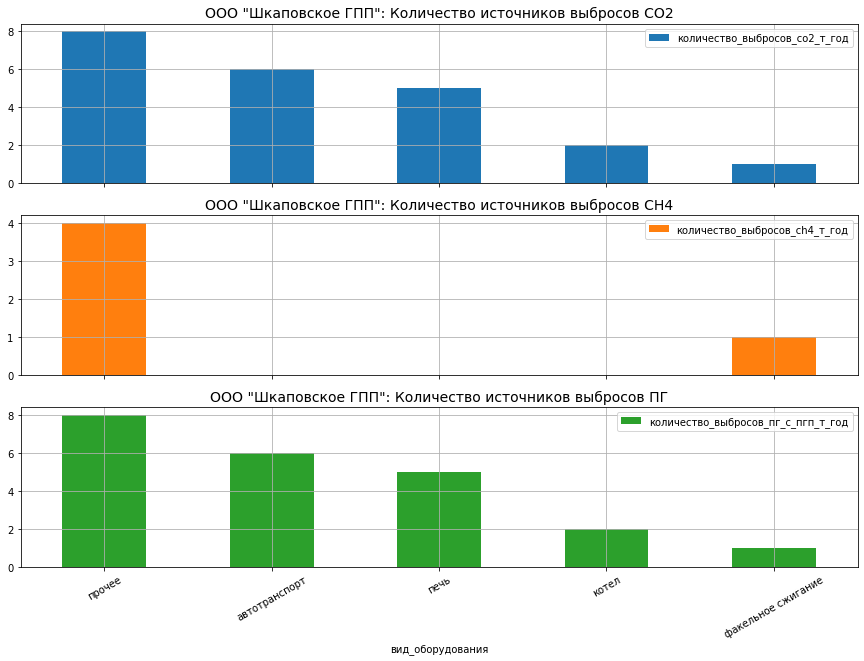

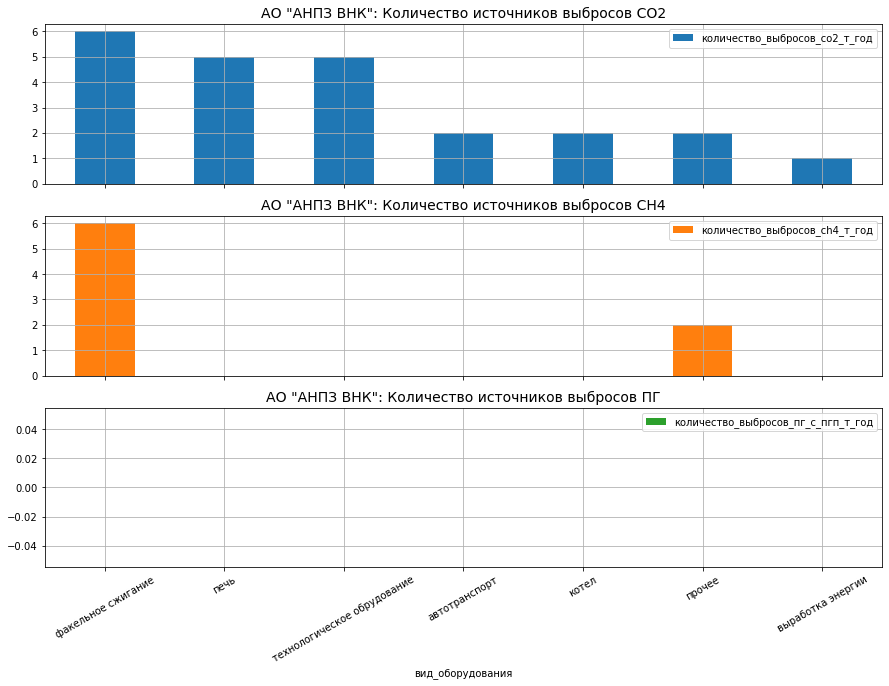

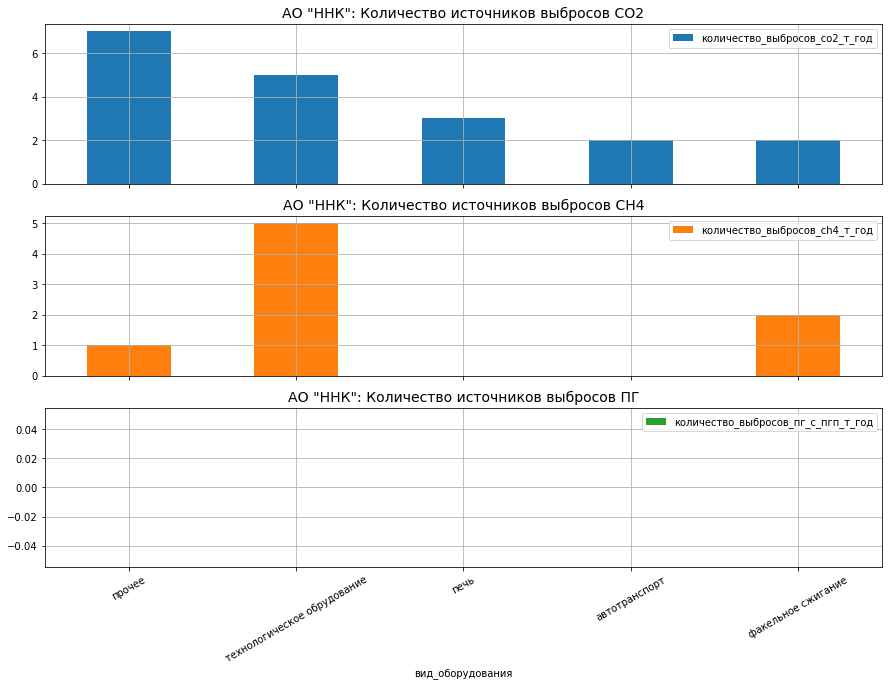

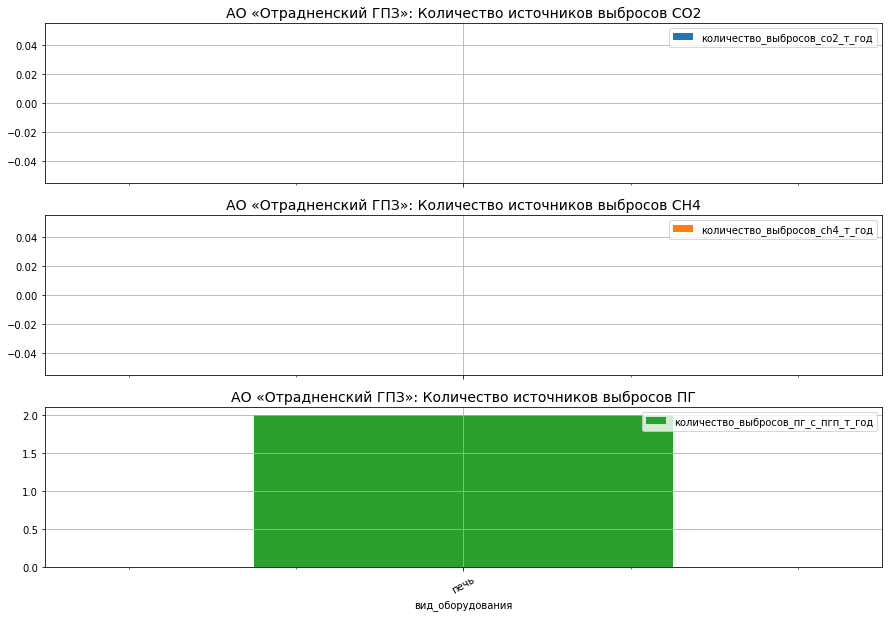

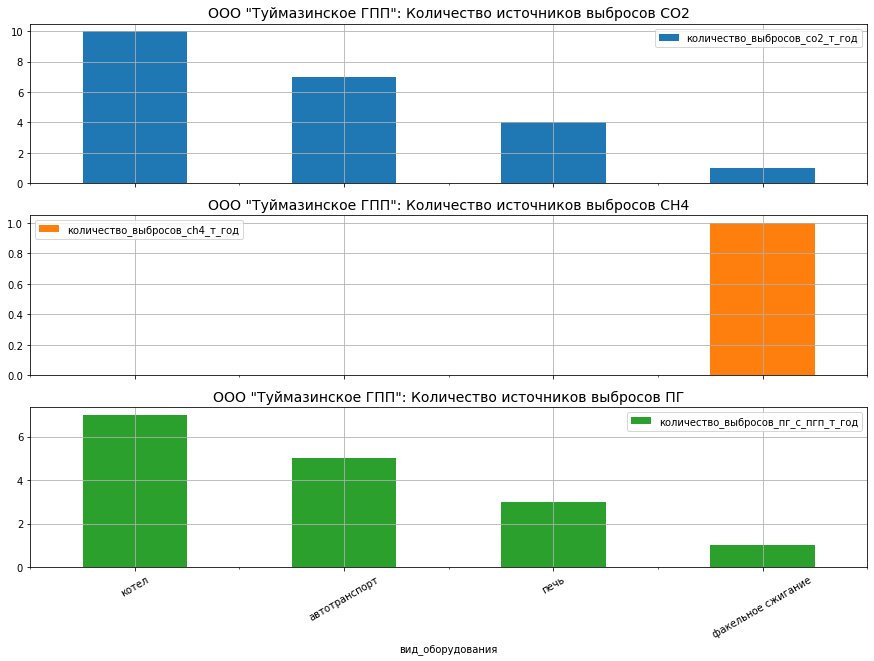

In [73]:
# группируем по обществу и внутри общесва группируем по количеству источникам

# Для каждого ОГ
for og in df['Наименование ОГ'].unique():
        mask = df['Наименование ОГ'] == og
        temp_og_df = df[mask].groupby(by='вид_оборудования', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].count()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)
        
        axes = temp_og_df.plot( 
        kind='bar', 
        grid=True, 
        figsize=(15, 10),
        x='вид_оборудования',
        subplots=True,
        rot=30
        );
        axes[0].set_title(f'{og}: Количество источников выбросов СО2', fontsize=14)
        axes[1].set_title(f'{og}: Количество источников выбросов CH4', fontsize=14)
        axes[2].set_title(f'{og}: Количество источников выбросов ПГ', fontsize=14);

### Аггрегация по сумме потребляемого топлива

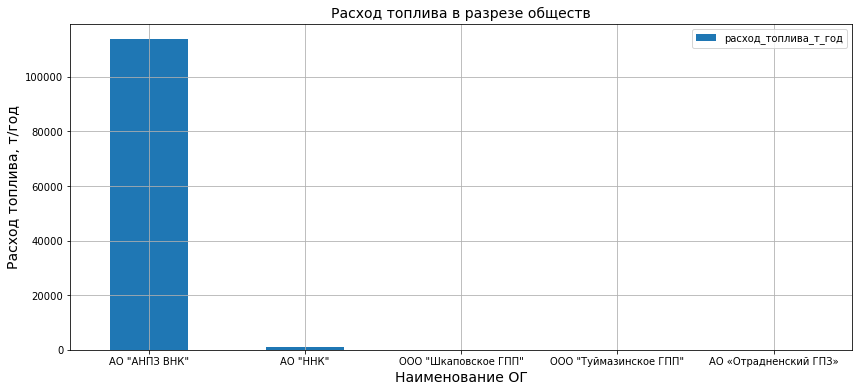

In [62]:
# группируем по обществу и суммируем по выбранным столбцам, сортируем по выбросам СО2
df_og_group_fuel = df.groupby(by='Наименование ОГ', as_index=False)[['расход_топлива_т_год']].sum()\
    .sort_values(by='расход_топлива_т_год', ascending=False)

# строим график
axes = df_og_group_fuel.plot( 
    kind='bar', 
    grid=True, 
    figsize=(14, 6),
    x='Наименование ОГ',
    subplots=True,
    rot=0
);
axes[0].set_title('Расход топлива в разрезе обществ', fontsize=14)
axes[0].set_ylabel('Расход топлива, т/год', fontsize=14);
axes[0].set_xlabel('Наименование ОГ', fontsize=14);

## Группируем по оборудованию

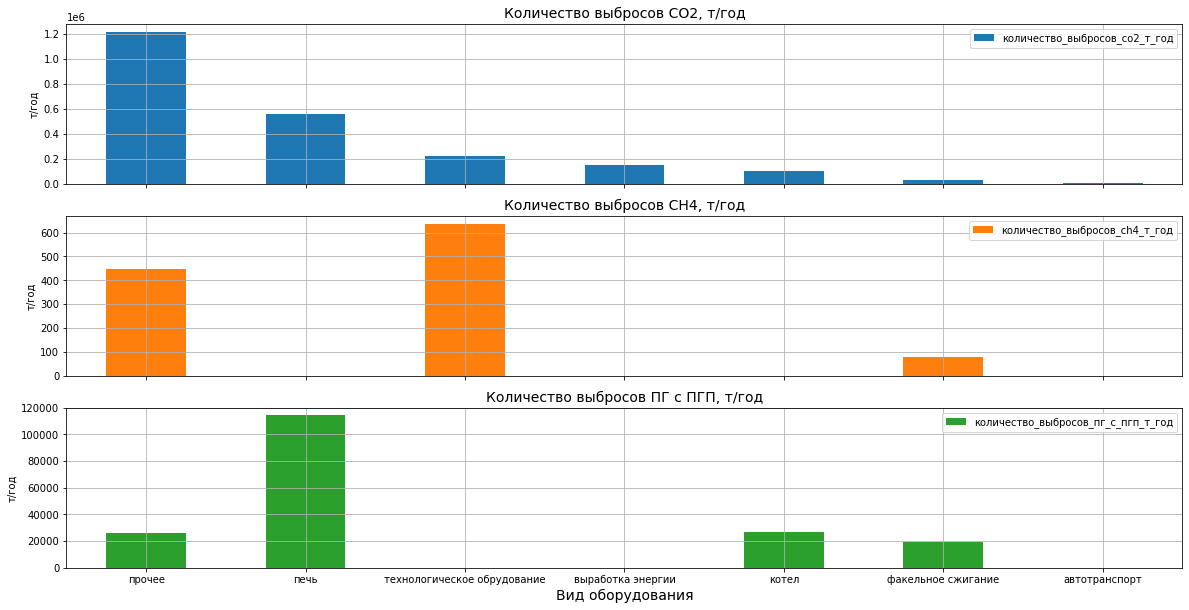

In [63]:
df_equip_group = df.groupby(by='вид_оборудования', as_index=False)[['количество_выбросов_со2_т_год', 'количество_выбросов_сh4_т_год', 'количество_выбросов_пг_с_пгп_т_год']].sum()\
    .sort_values(by='количество_выбросов_со2_т_год', ascending=False)

axes = df_equip_group.plot( 
    kind='bar', 
    grid=True, 
    figsize=(20, 10),
    x='вид_оборудования',
    subplots=True,
    rot=0
);
axes[0].set_title('Количество выбросов СО2, т/год', fontsize=14)
axes[1].set_title('Количество выбросов CH4, т/год', fontsize=14)
axes[2].set_title('Количество выбросов ПГ с ПГП, т/год', fontsize=14);

axes[0].set_ylabel('т/год')
axes[1].set_ylabel('т/год')
axes[2].set_ylabel('т/год')

axes[2].set_xlabel('Вид оборудования', fontsize=14);

## Cохраняем инфу по каждому обществу на отдельный лист

In [64]:
with pd.ExcelWriter(output_path + 'result_analysys.xlsx') as writer:
    # сохраняем исходную таблицу на лист main
    df.to_excel(writer, sheet_name='main')
    # по каждому обществу сохраняем инфу на отдельных лист, с названием как само общество
    for og in df['Наименование ОГ'].unique():
        mask = df['Наименование ОГ'] == og
        sheet_name = og
        curr_df = df[mask]
            
        curr_df.to_excel(writer, sheet_name=sheet_name)